In [2]:
import sklearn
import matplotlib.pyplot as plt
import kaggle
import pandas as pd
import zipfile 

In [3]:
!kaggle datasets download oktayrdeki/heart-disease

Dataset URL: https://www.kaggle.com/datasets/oktayrdeki/heart-disease
License(s): other
heart-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
def unzipFile(file):
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

unzipFile('heart-disease.zip')

In [5]:
raw_data = pd.read_csv('heart_disease.csv')
raw_data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [7]:
raw_data.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


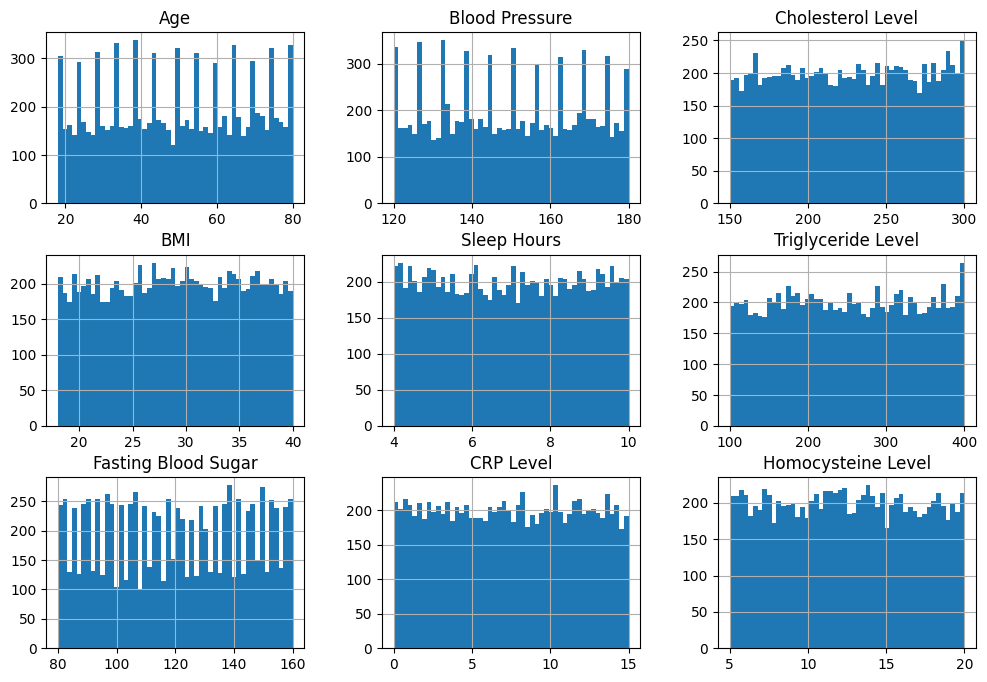

In [8]:
# histograms of numerical values from the data 
raw_data.hist(bins = 50, figsize=(12, 8))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

features_num = raw_data.select_dtypes(include=['float64']).columns.tolist()
features_cat = raw_data.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", features_num)
print("Categorical features:", features_cat)
X = raw_data[features_cat + features_num]
Y = raw_data['Heart Disease Status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y, random_state=42)

Numerical features: ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']
Categorical features: ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']


In [10]:
raw_data_features = raw_data.drop(columns = 'Heart Disease Status')
raw_data_encoded = pd.get_dummies(raw_data_features, columns=['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Stress Level', 'Sugar Consumption', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption'])
object_corr_matrix = raw_data_encoded.corr()
print(object_corr_matrix)

                                 Age  ...  Alcohol Consumption_Medium
Age                         1.000000  ...                    0.015360
Blood Pressure             -0.020781  ...                   -0.003593
Cholesterol Level           0.011371  ...                   -0.007196
BMI                         0.011229  ...                   -0.011014
Sleep Hours                 0.002481  ...                    0.002168
Triglyceride Level         -0.008112  ...                   -0.004170
Fasting Blood Sugar        -0.006019  ...                    0.001046
CRP Level                   0.008779  ...                    0.007039
Homocysteine Level         -0.007084  ...                    0.013989
Gender_Female               0.008637  ...                    0.006697
Gender_Male                -0.006193  ...                   -0.006351
Exercise Habits_High       -0.004032  ...                    0.002442
Exercise Habits_Low         0.011677  ...                    0.007507
Exercise Habits_Medi

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def numericalPipeline(numericalData):
    """
    Parameter:
    - numericalData, when using this function it only handles numerical dtype
    """
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'median')),
        ('std_scaler', StandardScaler())
    ])
    return numerical_pipeline

def categoricalPipeline(textData):
    """
    Parameter:
    - textData: when using this func it only handles categorical dtypes
    """
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('cat_encoder', OneHotEncoder())
    ])
    return cat_pipeline
    
def preprocessor(unprocessedData, num_features, cat_features):
    """
    Parameters:
    - unprocessedData: the raw dataset to preprocess
    - num_featueres: list of columns for numerical features 
    - cat_features: list of columns for categorical features 
    """
    preprocessor = ColumnTransformer([
        ('num', numericalPipeline(unprocessedData[num_features]), num_features),
        ('cat', categoricalPipeline(unprocessedData[cat_features]), cat_features)
    ])
    return preprocessor

In [15]:
preprocessor_pipeline = preprocessor(raw_data,features_num,features_cat)
X_train_processed = preprocessor_pipeline.fit_transform(X_train)
X_test_processed = preprocessor_pipeline.transform(X_test)
print(X_train_processed.shape)
print(Y_train.shape)

(8000, 37)
(8000,)


In [16]:
from sklearn import svm 
svm_model = svm.SVC()
svm_model.fit(X_train_processed, Y_train)

SVC()

In [24]:
heart_disease_predictions = svm_model.predict(X_train_processed)
print(f"SVM Predictions {heart_disease_predictions[:5]}")
print(f"Actual Result {Y_train.iloc[:5]}")


SVM Predictions ['No' 'No' 'Yes' 'Yes' 'No']
Actual Result 7395     No
5642     No
8866    Yes
8517    Yes
3706     No
Name: Heart Disease Status, dtype: object


In [21]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_processed, Y_train)

DecisionTreeClassifier()

In [23]:
heart_disease_predictions_dtc = decision_tree_model.predict(X_train_processed)
print(f"Decision Tree Predictions {heart_disease_predictions_dtc[:5]}")
print(f"Actual Results {Y_train.iloc[:5]}")

Decision Tree Predictions ['No' 'No' 'Yes' 'Yes' 'No']
Actual Results 7395     No
5642     No
8866    Yes
8517    Yes
3706     No
Name: Heart Disease Status, dtype: object


In [25]:
from sklearn.model_selection import cross_val_score
# K Fold cross validation with 3 folds trains the model 3 times holding out a different fold for validation each time
# Support Vector Machine model 
cross_val_score(svm_model,X_train_processed, Y_train, cv = 3, scoring = "accuracy")



array([1., 1., 1.])

In [26]:
# Cross validation with Decision Tree 
cross_val_score(decision_tree_model, X_train_processed, Y_train, cv = 3, scoring = "accuracy")

array([1., 1., 1.])

In [1]:
from sklearn.model_selection import cross_val_predict
# performs k fold cross validation but returns the predictions made on each test fold
y_train_pred_svm = cross_val_predict(svm_model, X_train_processed, Y_train, cv = 3)
print(f"SVM model cross validation {y_train_pred_svm}")
y_train_pred_dt = cross_val_predict(decision_tree_model, X_train_processed, Y_train, cv =3)
print(f"DT model cross validtion {y_train_pred_dt}")



NameError: name 'svm_model' is not defined

In [29]:
from sklearn.metrics import confusion_matrix
# making confusion matrix for more binary classification performance measuring 
cm_svm = confusion_matrix(Y_train,y_train_pred_svm)
# the first row and first column represents true negatives and second column are the false positives and the second row and
# first column represents false negatives and the second column of the second row represents true positives 
cm_dt = confusion_matrix(Y_train,y_train_pred_dt)
print(f"SVM cm: {cm_svm}")
print(f"DT cm: {cm_dt}")

[[6400    0]
 [   0 1600]]


In [ ]:
from sklearn.metrics import precision_score, recall_score
svm_precision_score = precision_score(Y_train,y_train_pred_svm)
dt_precision_score = precision_score(Y_train,y_train_pred_dt)
svm_recall_score = recall_score(Y_train, y_train_pred_svm)
dt_recall_score = recall_score(Y_train,y_train_pred_dt)


print(f"SVM precision score: {svm_precision_score}")
print(f"DT precision score : {dt_precision_score}")
print(f"SVM recall score : {svm_recall_score}")
print (f"DT recall score : {dt_recall_score}")